  <blockquote><h1> LOCALISATION DE SOURCE </h1></blockquote>
 

## Bibliotheques 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from glob import * 
from BF_algo import *

### Signal source 

# 

Text(0.5, 1.0, 'signal generé')

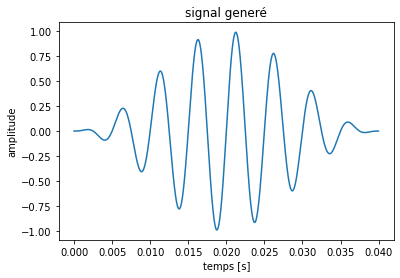

In [11]:

# vitesse du son dans l'air
c0 = 340.

# Création du vecteur d'échantillons de temps 
fs = 44100     # freq d'échantillonnage [Hz]
dt = 1./fs      # résolution temporelle [s]
T_source = 0.04  #durée de limpulsion génerée


N_time = int(T_source*fs)
source = signal_genere(1,T_source,fs,200) #generer le signal

t = np.linspace(0, T_source-dt, N_time)
plt.plot(t,source)
plt.xlabel('temps [s]')
plt.ylabel('amplitude')
plt.title('signal generé')

### Simulaiton d'une antenne unifrome lineaire 

In [12]:
# création d'un tableau linéaire uniforme (Antenne)

L = 0.36  # Taille du tableau [mettre]
M = 7   # Nombre de capteurs mems dans le tableau d'antenne (doit être impair !) 
antenne_Obj = Antenne(L, M)
print("Nombre de microphones :",antenne_Obj.M)   
print("La distance en mètre :",antenne_Obj.L)    
print("distance inter-microphones :",antenne_Obj.d)    
print("Coordonnées de chaque microphones suivant axe X :",antenne_Obj.coordonnees_2D[0,:])
print("Coordonnées de chaque microphones suivant axe X :",antenne_Obj.coordonnees_2D[1,:])   

Nombre de microphones : 7
La distance en mètre : 0.36
distance inter-microphones : 0.06
Coordonnées de chaque microphones suivant axe X : [-0.18 -0.12 -0.06  0.    0.06  0.12  0.18]
Coordonnées de chaque microphones suivant axe X : [0. 0. 0. 0. 0. 0. 0.]


### Simulation des signaux de sortie de chaque microphone

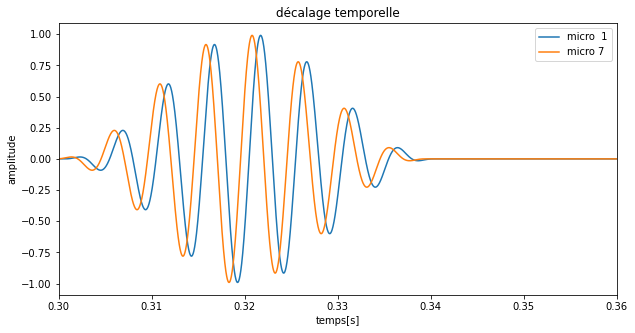

In [13]:
theta0_deg = 30 # direction de notre source
T = 1       # durée de l'enregistrement [s] il faut que T > durée de signal simulé
t_initial = 0.3 
t_enr = np.linspace(0, T-dt, T*fs)
p_array =  creer_signals_antenne(antenne_Obj, source, t_initial, T , theta0_deg,
                        fs, c0=340, SNR_dB=None)

plt.figure(figsize=(10,5))

plt.xlabel('temps[s]')
plt.ylabel('amplitude')
plt.title('décalage temporelle')
plt.plot(t_enr,p_array[0,:],label='micro  1')
plt.plot(t_enr,p_array[6,:],label='micro 7')
plt.xlim([t_initial,0.36])
plt.legend()

### Beamforming

direction de notre signal : 30
L'angle calculé par beamforming : 30


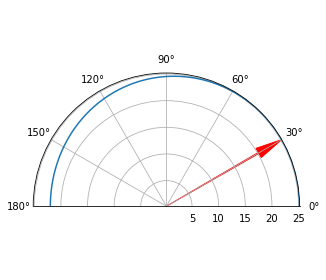

In [14]:
# vecteur d'échantillons de temps
t = np.linspace(0, T-dt, N_time)

# utiliser le beamforming à retardement et à somme pour déterminer la direction d'arrivée
N_theta = 181
theta = np.linspace(0, np.pi, N_theta)

weights = np.ones(M)
y_beamformer,y_energie_dB,angle= beamforming(antenne_Obj, p_array, theta, weights, fs)

dB_max = y_energie_dB.max()
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
# Plage dynamique du tracé polaire
dyn_range = 25      # dB
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(theta, y_energie_dB)

# ajouter une flèche indiquant la direction d'arrivée du signal
ax.arrow(angle*np.pi/180, dB_max-dyn_range, 0, dyn_range, width=0.01,
         head_width=0.1, head_length=5,
         length_includes_head=True, edgecolor = 'red', facecolor = 'red')

ax.set_rmax(dB_max)
ax.set_rmin(dB_max - dyn_range)

ax.set_thetamin(0)
ax.set_thetamax(180)
fig.set_tight_layout(True)

print(f"direction de notre signal : {theta0_deg}")
print(f"L'angle calculé par beamforming : {angle}")